# Gradient Descent for Linear Regression

## Needed Imports

In [1]:
%matplotlib notebook

# plotting library (completely optional)
from matplotlib.pyplot import (
    legend, # to show line names in graph
    plot, # to plot line graph
    scatter, # to plot dotted graph
    show # to show plotted graph
)

# for numeric operations. just to make code easy
from numpy import (
    array, # to make matrix operations easy
    mean, # to calculate average of a list of numbers
    sqrt, # to find square root
    square # to find square of a number
)

## Data Processing

In [2]:
# dataset with independent (x) & dependent (y) values

data_set = array([
    [32,31], [53,68], [60,62], [47,71], [59,87],
    [55,78], [52,79], [39,59], [48,75], [52,71],
    [45,55], [54,82], [44,62], [58,75], [56,81],
    [48,60], [44,82], [60,97], [45,48], [38,56],
    [66,83], [65,11], [47,57], [41,51], [51,75]
])

In [3]:
# seperating x & y from dataset

x_list = data_set[:, 0]
y_list = data_set[:, 1]

## Linear Model's Weights

In [4]:
# initial model's parameters (for line equation)
# with these values, we get a horizontal straight line

intercept = 0
slope = 0

## Model's Hyper Parameters

In [5]:
# training rate & iteration cycle count
# depends on increasing accuracy and time for each cycle

learning_rate = 0.0001
iteration_cycles = 1000

In [6]:
count = len(x_list)

## Prediction function (Line Equation)

In [7]:
# formula to find a (y) coordinate given its x-axis coordinate in a straight line

def line_equation(x):
    return slope * x + intercept

## Training (Gradiant Descent)

In [8]:
# training for 1000 runs. rate of increase in accuracy decreases with each iteration
for _ in range(1000):
    
    # getting new y-axis coordinates for all actual x-axis coordinates using line equation
    new_y = list(map(line_equation, x_list))
    
    # differencfe between actual coordinare & the one with the new one
    y_difference = y_list - new_y
    
    # getting changes for intercept & slope values with respect to error (bigger error make big change to intercept & slope)
    intercept_gradient = sum(2 / count * y_difference)
    slope_gradient = sum(2 / count * y_difference * x_list)
    
    # updating intercept & slope 
    intercept += learning_rate * intercept_gradient
    slope += learning_rate * slope_gradient

## Prediciton with Training-Set

In [9]:
# finding new y-axis coordinates with slope & intercept after 1000 corrections
predicted_y = list(map(line_equation, x_list))

# error function (there are a lot. we can choose any function)
# RMSE maximizes errors which are lesser than 1 and minimizes errors which are greater than 1. so choose wisely
rmse = sqrt(mean(square(y_list - predicted_y)))

In [10]:
# printing new values
print("intercept =", intercept)
print("slope =", slope)
print("rmse =", rmse)

intercept = 0.17933157753031664
slope = 1.2964981522117367
rmse = 17.73492644296715


## Prediciton with Testing-Set

In [11]:
# finding y-axis coordinates for new x-axis coordinates
test_x = [44, 32, 63]
test_y = list(map(line_equation, test_x))

## Visualizing Results

<IPython.core.display.Javascript object>


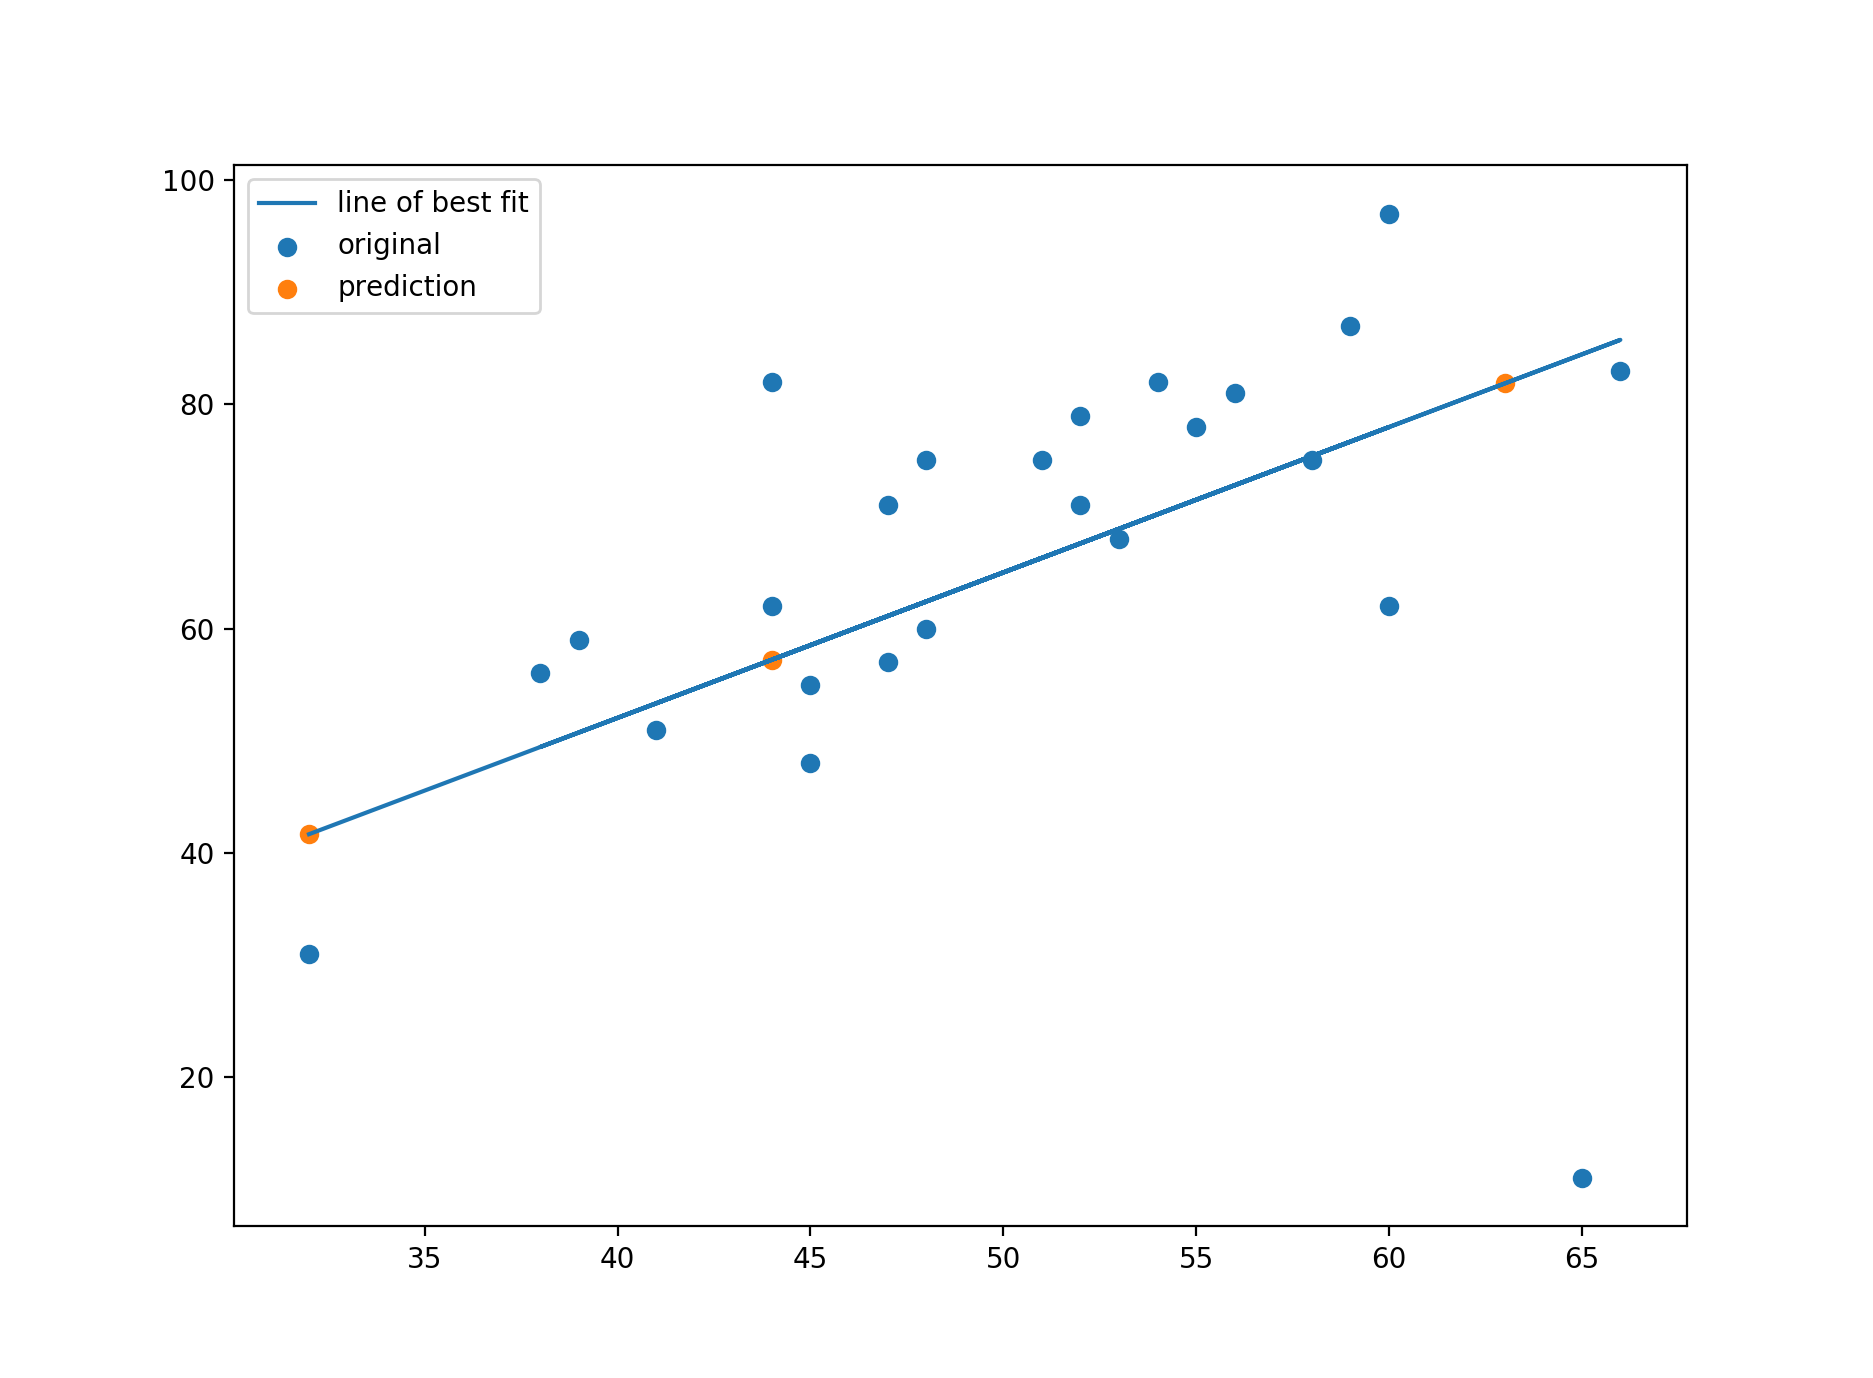

In [12]:
# plotting actual points, new predictions & line of best fit for actual points
scatter(x_list, y_list, label='original')
scatter(test_x, test_y, label='prediction')
plot(x_list, predicted_y, label='line of best fit')
legend()
show()